In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import sys, io, os, errno, fileinput, csv
import collections as cl
from os import path
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
import matplotlib as plt
import seaborn as sb
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import tensorflow as tf
from tensorflow import keras as kr
import itertools
import warnings
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import cross_val_score
from joblib import dump, load


trainset_file = "../../Datasets/the_onion.csv"
train_df = pd.read_csv(trainset_file,  sep=',')
trainset_file1 = "../../Datasets/train_2.csv"
train_df1 = pd.read_csv(trainset_file1,  sep=',')

trainset_file2 = "../../Datasets/train_1.csv"
df = pd.read_csv(trainset_file2,  sep=',')


count_vect = CountVectorizer(lowercase=True)
tfidf_transformer = TfidfTransformer(smooth_idf=False)
# svd = TruncatedSVD(n_components=16384)
train_df

,Unnamed: 0,author,domain,num_comments,score,subreddit,timestamp,title
0,0,DisastrousCandy3,theonion.com,0,1,TheOnion,1555122997,Rising Income Inequality Causing Wealthy Ameri...
1,1,ZVan12,kwqc.com,1,1,TheOnion,1555118645,Woman Crashes Car After Seeing Spider Riding S...
2,2,MyNameIsGriffon,theonion.com,0,1,TheOnion,1555106860,Lockheed Martin Executive Fondly Recalls Humbl...
3,3,MyNameIsGriffon,theonion.com,0,1,TheOnion,1555106859,Experts Warn Prosecuting Assange Creates Slipp...
4,4,MyNameIsGriffon,sports.theonion.com,0,1,TheOnion,1555106858,Kid About To Meet Brooklyn Nets Must Not Be Ve...
5,5,SlovenianCat,youtu.be,0,1,TheOnion,1555106482,Lawmaker's War Hero Son Would Have Wanted Road...
6,6,aresef,entertainment.theonion.com,0,1,TheOnion,1555105378,Nation Admits They Only Care About Freedom Of ...
7,7,MyNameIsGriffon,theonion.com,1,1,TheOnion,1555099714,Media Condemns Julian Assange For Reckless Exp...
8,8,MyNameIsGriffon,sports.theonion.com,0,1,TheOnion,1555099714,Duke Anthropology Professor Devastated To Lear...
9,9,Bearsrock2468,i.redd.it,2,1,TheOnion,1555095395,I know it's satire but


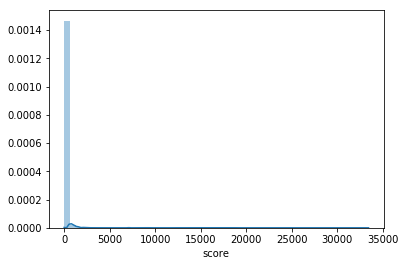

In [2]:
#train_df['score'].plot()
sb.distplot(train_df['score'])
#sb.distplot(train_df1['spam_score'])

In [3]:
""" 10-Fold Cross Validation """
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics

def cross_val(model):
    seed = 7
    np.random.seed(seed)
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
    cvscores = []
    i = 0
    for train, test in kfold.split(X, Y):

        _ = model.fit(X[train],Y[train]) # train
        predicted = model.predict(X[test])
        i += 1
        cvscores.append(np.mean(predicted == Y[test]) * 100)
        # precision += precision_score(test_Y, predicted, average='macro')
        # recall += recall_score(test_Y, predicted, average='macro')
        # f1_sc += f1_score(test_Y, predicted, average='macro')
        print('iter ',str(i))
    
    print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))
    return

In [4]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=8192, stop_words='english', lowercase=True, ngram_range=(1, 3),smooth_idf=False)

df = df.dropna(subset=['title'])
vectorizer.fit(df['title'].astype('U'))
X = vectorizer.transform(df['title'].astype('U'))
Y = df['label']
Y = Y.values
print(np.size(X,1))

# train = train_df[['domain','score']]
# train = train.dropna(subset=['domain'])
# X = train['domain'].astype('U')
# Y = train['score']
# Y = Y.values

8192


In [5]:
svm_model = svm.SVC(kernel='linear', C=1.05, decision_function_shape='ovr',cache_size=500) # 1.1 93.8
cross_val(svm_model)

iter  1
iter  2
iter  3
iter  4
iter  5
iter  6
iter  7
iter  8
iter  9
iter  10
94.09% (+/- 0.37%)


In [7]:
with open('../../models/meta_tfidf.pickle', 'wb') as fin:
    pickle.dump(vectorizer, fin)
    
dump(svm_model, '../../models/metaSVM.joblib') 

['../../models/metaSVM.joblib']